# Expected Employment Outcome by University Major

In this project, I will be working with a dataset containing the job outcomes of students by collegiate major program that graduated between 2010 and 2012. In my analysis, I will attempt to determine the following:
- Does the popularity of the major affect a student's future salary?
- Which majors are predominantly male or female?
- How has the percentage of women in each major changed over time?

## 1. First Look at the Data

The original data on job outcomes was released on [American Community Survey](https://www.census.gov/programs-surveys/acs/) and a cleaned version of the dataset can be downloaded [here](https://github.com/fivethirtyeight/data/tree/master/college-majors). Before I analyze the dataset, I will first import the appropriate libraries, read in the dataset, and take a look at the dataset's structure.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
%matplotlib notebook

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

In [3]:
recent_grads.loc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

The most pertinent columns to my analysis are the following:
- Total = shows the number of people enrolled in the major, which could be used to indicate popularity
- ShareWomen = useful for comparing majority-male majors to majority-female majors
- Unemployment_rate = indicator that a certain major is highly desired
- Median = useful for determining the highest and lowest-earning majors

I will examine the relationship between these various column in later sections.

### a) Top and Bottom Earning Majors

To get a better understanding of the data, I will take a look at the top and bottom-earning majors.

In [4]:
recent_grads.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [5]:
recent_grads.tail(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


The highest-earning majors are all in the "Engineering" major category and all are majority male . In contrast, two out of three of the lowest-earning majors are in the "Psychology & Social Work" major category and all of them are predominately female.

### b) Getting Rid of Null Values

Null values in the dataset might skew results, so I will find and get rid of all data entries that contain null values.

In [6]:
print(len(recent_grads.values))
recent_grads = recent_grads.dropna()
print(len(recent_grads.values))

173
172


There was only one data entry that contained a null value and it has now been removed from the dataset. Now I will begin analyzing the relationships between the various columns in the dataset.

## 2. Frequency Distribution of Selected Variables

The most interesting columns to analyze are Total, Median, Unemployment_rate, and ShareWomen. I will create a histogram for each so I can examine the frequency distribution of possible values within each column.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313:

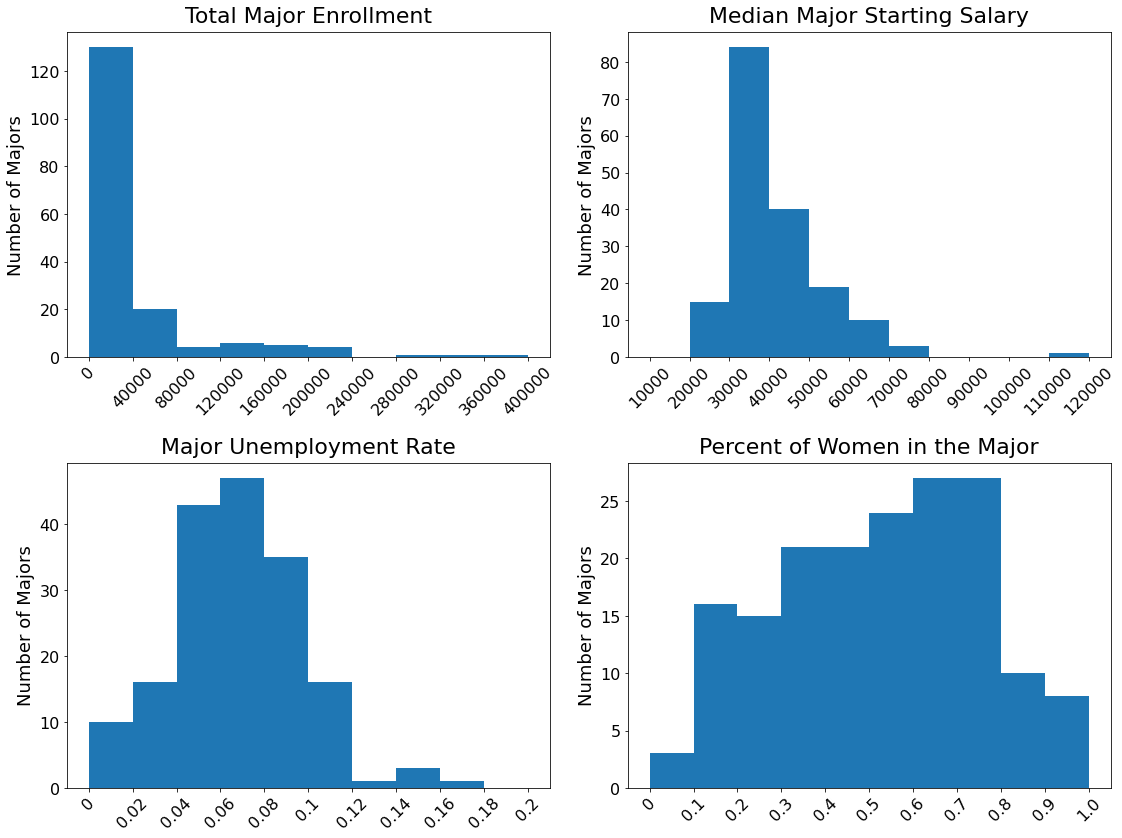

In [7]:
# Columns in the dataset that will be analyzed
cols_of_interest = ["Total", "Median", "Unemployment_rate", "ShareWomen"]

bin_list = [
            [*range(0, 420000, 40000)],
            [*range(10000, 130000, 10000)],
            [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2],
            [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
        ]

# Must specify labels in order to manipulate the size
ylabels = [
            [*range(0, 140, 20)],
            [*range(0, 90, 10)],
            [*range(0, 50, 10)],
            [*range(0, 30, 5)]
        ]

# Individual titles for each of the frequency distributions
title = ["Total Major Enrollment", "Median Major Starting Salary",
          "Major Unemployment Rate", "Percent of Women in the Major"]

# Plots out the histograms seen below
fig = plt.figure(figsize=(16,12))

for r in range(4):
    ax = fig.add_subplot(2,2,r+1)
    ax = recent_grads[cols_of_interest[r]].plot(kind='hist', rot=45, bins=bin_list[r])
    ax.set_title(title[r], fontsize=22, y=1.01)
    ax.set_xticks(ticks=bin_list[r]) # sets up x-ticks to match the bins
    ax.set_xticklabels(bin_list[r], fontsize=16) # sets up x_tick labels to match the bins
    ax.set_yticklabels(ylabels[r], fontsize=16) # enables manipulation of size
    ax.set_ylabel("Number of Majors", fontsize=18)
    
fig.tight_layout(pad=2)    

The Total Major Enrollment histogram indicates that the majority of majors (over 120 out of 172) have less than 40k students enrolled. However, a few majors have an incredibly large number of students enrolled, with one major having at least 380k students enrolled. Thus, I hypothesize that there are a few broad-scope majors with a high number of students (ex. "Biology", "Economics", etc.) and many specialized majors ("Petroleum Engineering", "Actuarial Science", etc.) with much fewer students.

Based on the Median Major Starting Salary histogram, the vast majority of majors have a median salary of less than 50k a year, and only one has a median salary of over 80k a year (Petroleum Engineering, as it is the first entry in the dataset).

The Major Unemployment Rate histogram indicates that the vast majority of majors have an unemployment rate between 4% and 10%, which is decent for people in their young twenties. Less than 30 out of 172 have an unemployment rate of less than 4%, and less than 10 have an unemployment rate of above 12%.

Based on the Percent of Women in the Major histogram, there are slightly more majors that are majority female than there are majors that are majority male. This most likely indicates that women are more prevalent in univerisites.

## 3. Comparing Columns in the Dataset Using Scatterplots

In order to determine if there is a relationship between the Total, Median, Unemployment_rate, and ShareWomen columns in the dataset, I will create a series of scatter plots to examine their relationships.

### a) Total Enrollment vs. Median Starting Salary

First I will examine the relationships between the total number of students enrolled in a major and the median starting salary these students can expect to receive after graduation.

<AxesSubplot:title={'center':'Total Enrollment vs. Median Starting Salary'}, xlabel='Total', ylabel='Median'>

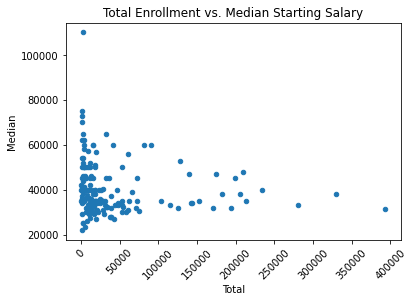

In [8]:
recent_grads.plot(x='Total', y='Median', kind='scatter', title='Total Enrollment vs. Median Starting Salary', rot=45)


It's very difficult to determine whether there is a relationship between the total enrollment in a major and it's median starting salary. However, it is noteworthy that both the highest-earning majors and the lowest-earning majors have very few students.

I hypothesize that high-paying majors have high qualifications for being accepted into a program and thus don't allow many students to enroll, resulting in very few students. However, the lowest-paying majors also have very few students because their low perspective salaries discourages students from enrolling in such programs.

### b) Total Enrollment vs. Unemployment Rate

Next I will examine the relationships between the total number of students enrolled in a major program and the expected unemployment rate for students of that major in the first year after graduation.

<AxesSubplot:title={'center':'Total Major Enrollment vs. Unemployment Rate'}, xlabel='Total', ylabel='Unemployment_rate'>

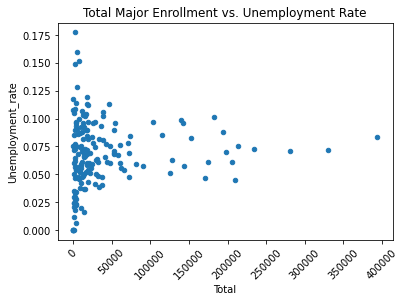

In [9]:
recent_grads.plot(x="Total", y="Unemployment_rate", kind="scatter", title="Total Major Enrollment vs. Unemployment Rate", rot=45)


The distribution of values on this scatterplot is very interesting. It appears as though the majors with the lowest unemployment rates have very few students but the majors with the highest unemployment rates also have very few students. The majors with the most students seem to have an unemployment rates between 4% and 10%, as noted earlier when examining the Major Unemployment Rate histogram. 

One possible explanation for this disparity is that majors that are in high demand (such as STEM, especially engineering) have very high requirements and thus few students are able to successfully enroll in these programs. Such majors would have  low unemployment rates because they are in high demand yet few people are qualified. 

On the other hand, few students would choose to study majors that aren't in high demand because they want to have steady career prospects after graduation. These majors would have high unemployment rates because there are few positions avaiable for students after graduation.

### c) Share Women vs. Median Starting Salary

Next I will examine the relationships between the percentage of women enrolled in a major program and the expected starting salary after graduation. First, I will create a ShareMen column so I can simultaneously analyze how percentage of women and percentage of men affect a recent graduate's median starting salary.

In [10]:
recent_grads["ShareMen"] = 1 - recent_grads["ShareWomen"]

<AxesSubplot:title={'center':'Men vs. Median Starting Salarly'}, xlabel='ShareMen', ylabel='Median'>

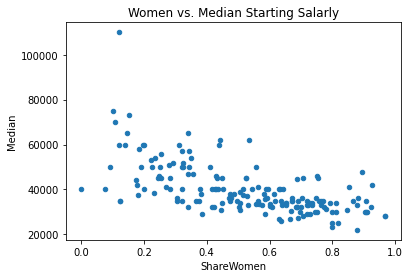

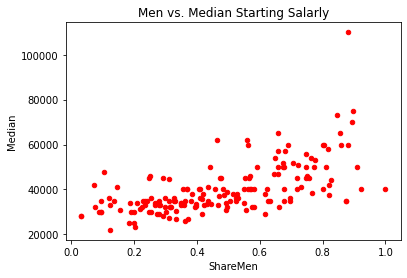

In [11]:
recent_grads.plot(x="ShareWomen", y="Median", kind="scatter", title="Women vs. Median Starting Salarly")
recent_grads.plot(x="ShareMen", y="Median", kind="scatter", title="Men vs. Median Starting Salarly", color="red")


There is a significant negative correlation between percentage of women in the major and the median starting salary of the job opportunities post-graduation. Amongst academic circles accross the United States, there is a significant debate as to why the average man makes more than the average woman. Many account the discrepancy to sexism in the workplace, but since sexism is difficult to measure, there isn't much evidence that supports these theories. 

However, as the charts above clearly demonstrate, another possible reason as to why men make more money than women is because a higher percentage of them choose to enter high-paying industries than women do. There aren't many majors that offer a starting salary above 60k, but of those that do, only one consists of more women than men (and not by a large margin). It seems as though a decent way to close the wage gap is to attempt to get more women enrolled in higher-paying industries.

### d) Share Women vs. Unemployment Rate

Next let's examine the relationships between the percent of women graduating with a given major and the unemployment rate after graduation.

<AxesSubplot:title={'center':'Share Women vs. Unemployment Rate'}, xlabel='ShareWomen', ylabel='Unemployment_rate'>

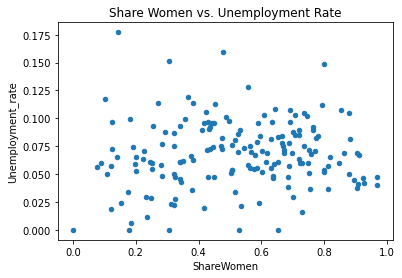

In [12]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter", title="Share Women vs. Unemployment Rate")


There isn't any noticeable correlation between the two variables, so I will move on to the next task.

## 4. Analyzing Male and Female Salaries by Major

One important observation from this dataset is that many of the high-paying majors are majority male whereas many of the low-paying majors are majority female. This could be part of the reason why men have a higher starting salary. Since this topic seems interesting, I will analyze the differences between male and female starting salaries by major in greater detail.

### a) Share of Men/Women in Highest and Lowest-Earning Majors

I will start by creating a bar chart that shows the percentage of men and women that are enrolled in both the ten highest-earning majors and the ten lowest-earning majors. I hypothesize that the highest-earning majors will consist of predominantly men and the lowest-earning majors will consist of predominatly women.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


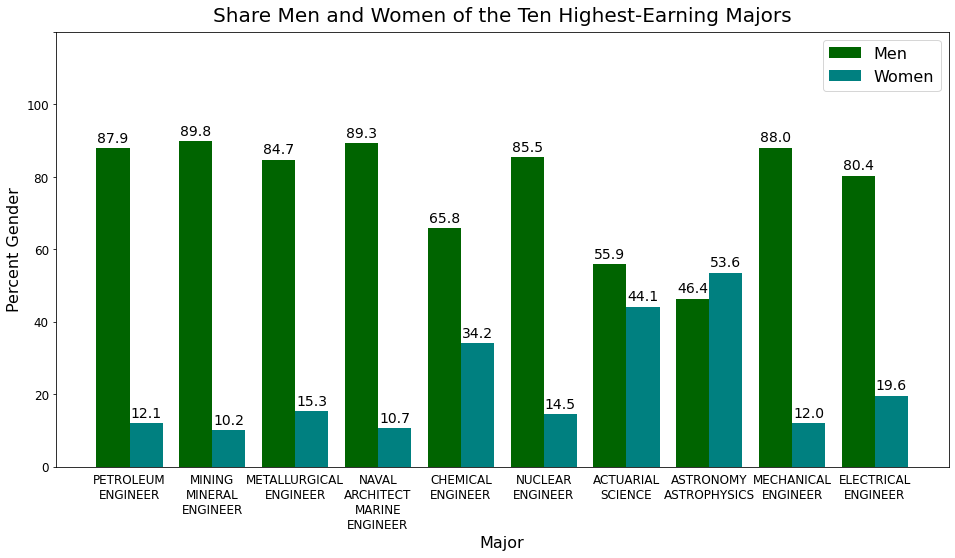

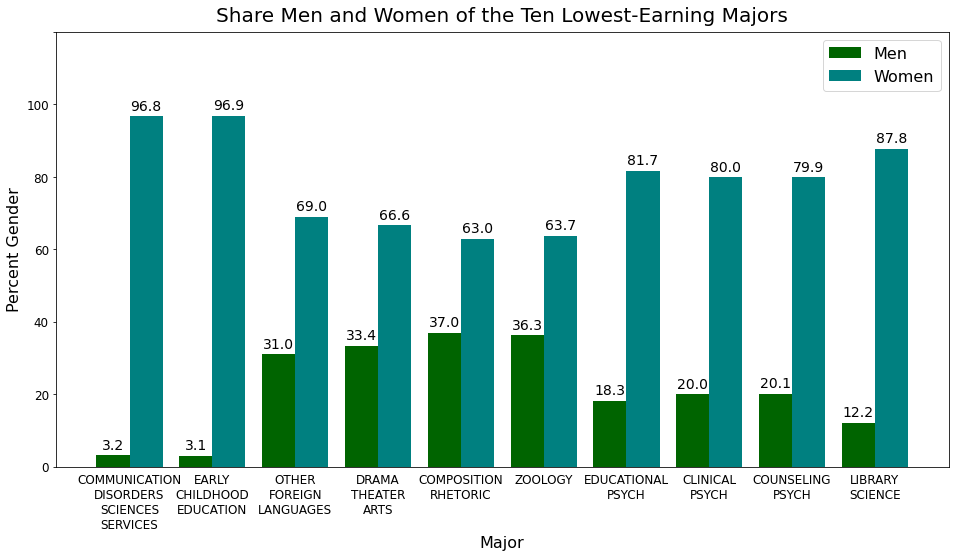

In [13]:
import numpy as np

majors = [list(recent_grads[:10]["Major"]), list(recent_grads[-10:]["Major"])]
share_men = [list(recent_grads[:10]["ShareMen"]), list(recent_grads[-10:]["ShareMen"])]
share_women = [list(recent_grads[:10]["ShareWomen"]), list(recent_grads[-10:]["ShareWomen"])]
titles = ["Share Men and Women of the Ten Highest-Earning Majors", "Share Men and Women of the Ten Lowest-Earning Majors"]

# Will format the major labels to make them more readable
def label_fixer(labels):
    new_labels = []
    for label in labels:
        label = label.replace(" AND", "")
        label = label.replace(" ", "\n")
        label = label.replace("ENGINEERING", "ENGINEER")
        label = label.replace("ARCHITECTURE", "ARCHITECT")
        label = label.replace("PSYCHOLOGY", "PSYCH")
        new_labels.append(label)
    return new_labels
                                                          
# Creates a text label with the percentage values right above each bar
def autolabel(bars):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height * 100, 1)),
                    xy=(bar.get_x() + bar.get_width() / 2, height), # XY position for placing text
                    xytext=(0, 3),  # Places percentage 3 points vertically
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=14)

majors = [label_fixer(majors[0]), label_fixer(majors[1])]
                                                          
x = np.arange(10)
width = 0.4

for sp in range(2):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1, 1, 1)
    mens = ax.bar(x - width/2, share_men[sp], width, label="Men", color="DarkGreen")
    womens = ax.bar(x + width/2, share_women[sp], width, label="Women", color="teal")
                
    ax.set_ylabel('Percent Gender', fontsize=16)
    ax.set_xlabel('Major', fontsize=16)
    ax.set_ylim(ymin=0, ymax=1.2)
    ax.set_title(titles[sp], fontsize=20, y=1.01)
    ax.set_xticks(x)
    ax.set_xticklabels(majors[sp], fontsize=12)
    ax.set_yticklabels([*range(0, 110, 20)], fontsize=12)
    ax.tick_params(axis="both", which="both", top=False, bottom=False, labelbottom=True)

    ax.legend(fontsize=16)
                                                          
    autolabel(mens)
    autolabel(womens)

plt.show()

As is evident from the bar graphs shown above, 9 out of 10 of the top ten highest-earning majors are majority men (Astronomy and Astrophysics has slightly more women than men), and 7 out of 10 are at least 80% male. In contrast, all of the ten lowest-earning majors are at least 60% women, while 6 out of 10 are at least 80% female (two are nearly 97% female!). This disparity is alarming as it implies that men will receive the vast majority of the highest salaries whereas women will recieve the vast majority of the lowest salaries.

### b) Average Male and Female Salaries

Let's analyze how much of the difference in starting salary between men and women is due to major choice. In order to get a good estimation of this difference, I will calculate the weighted average of all salaries for both men and women using the following steps:
1. Use the Men and Women columns to determine the number of men and women in each major
2. Multiply the number of men and women in each major by the Median column to get the total amount of income each gender earned in each major
3. Sum the major totals to find the total income each gender made
4. Divide the sum of the major totals per gender by the number of college graduates of each gender to get an estimate for the average starting salary of men and women accross all majors

This estimate accounts for differences in salary between men and women **between** majors without accounting for any differences that might exist **within** the same major.

In [14]:
men_count = 0
women_count = 0
men_accumulated_salary = 0
women_accumulated_salary = 0
problem_rows = []

for index, major in recent_grads.iterrows():
    men_count += int(major["Men"]) # total number of men in the dataset
    women_count += int(major["Women"]) # total number of women in the dataset
    men_accumulated_salary += (int(major["Men"] * major["Median"])) # total amount of money earned by men in the dataset during their first year
    women_accumulated_salary += (int(major["Women"] * major["Median"])) # total amount of money earned by women in the dataset during their first year

# Finds average salary for both men and women
men_average_salary = round(men_accumulated_salary / men_count, 2)
women_average_salary = round(women_accumulated_salary / women_count, 2)

# Prints out a summary of my findings
print("The average man graduating from college has a starting salary of ${}.".format(men_average_salary))
print("The average woman graduating from college has a starting salary of ${}.".format(women_average_salary))
print("On average, men graduating from college have a starting salary that is ${} higher than women.".format(round(men_average_salary - women_average_salary, 2)))
print("Female college graduates make ${} for every $1.00 a male college graduate makes during their first year.".format(round(women_average_salary / men_average_salary, 2)))


The average man graduating from college has a starting salary of $40574.77.
The average woman graduating from college has a starting salary of $36299.57.
On average, men graduating from college have a starting salary that is $4275.2 higher than women.
Female college graduates make $0.89 for every $1.00 a male college graduate makes during their first year.


Based on major choice alone, men make over $4200 more than women do. Factoring by major choice disregards other factors, such as negotiating ability or working longer hours, that could reveal an even greater disparity between male and female starting salaries. 

Nevertheless, the disparity is significant enough to indicate that one way to decrease the wage gap between men and women would be to attempt to recruit women into the higher-earning majors. However, universities should proceed with caution when encouraging women to enroll in majors they might not enjoy. There are inarguable differences between the genders and it is possible that men and women are simply choosing majors that they find interesting. Perhaps the best solution is to educate high school students on the average starting salaries of these majors so they can better decide which major to pursue, using both interest and earning potential as a guide.

## 5. Percentage of Men and Women in Major Categories Over Time

To add another dimension of analysis, I will examine another dataset that measures how the percentage of men and women within a major category has changed over time. Since a large portion of the wage gap between men and women is due to which majors each gender tends to choose, determining how the percentage of women within a major has changed over time will help indicate whether women are in the process of enrolling in high-earning major programs.

The main purpose of this analysis is to determine whether women have began increasingly enrolling in high-earning major programs over time or whether they have been increasingly enrolling in low-earning majors over time. This analysis will cover a 41 year period from 1970 to 2011. 

I hypothesize that nearly all majors will increase their percentage of women (since I predict that the percentage of women enrolling in university will increase over time) although the majority of that increase will be seen in low-earning majors. Note that I will be using the recent_grads dataset in order to determine the average starting salary of each major category. This will be useful in determining which major categories are high-earning and which are low-earning.

### a) Comparing the Two Datasets

First, I will read in the dataset containing the information about how the percentage of women over time has changed in each major category.

In [15]:
majors_over_time = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
majors_over_time.head(3)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


There are 17 different major categories in the majors_over_time dataset. Let's take a look at the categories in the recent_grads dataset to see if they are similar to those in the majors_over_time dataset. 

In [16]:
recent_grads["Major_category"].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Psychology & Social Work                9
Agriculture & Natural Resources         9
Social Science                          9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

There are 16 major categories in the recent_grads dataset and 17 major categories in the majors_over_time dataset. They appear to be relatively similar to one another. In the table below, I match each of the categories in the majors_over_time dataset with it's equivalent category in the recent_grad dataset.

| majors_over_time | recent_grads | 
| :--------------: | :---------: |
| Agriculture | Agriculture & Natural Resources |
| Architecture | N/A | 
| Art and Performance | Arts | 
| Biology | Biology & Life Sciences | 
| Business | Business | 
| Communications and Journalism | Communications & Journalism |
| Computer Science | Computers & Mathematics | 
| Education | Education | 
| Engineering | Engineering | 
| English | Humanities & Liberal Arts | 
| Foreign Languages | Humanities & Liberal Arts | 
| Health Professions | Health | 
| Math and Statistics | Computers & Mathematics | 
| Physical Sciences | Physical Sciences | 
| Psychology | Pschology & Social Work | 
| Public Administration | Law & Public Policy | 
| Social Sciences and History | Social Science | 

Although it's not perfect, almost every major category in majors_over_time matches with one of the categories in recent_grads. The only major category that doesn't have an equivalent is the "Architecture" column, which I will omit from my analysis.

The next step will be to calculate the weighted average of the Median income for each of the relevant major categories in the recent_grads dataset. This will be useful for determining whether women are increasingly enrolling themselves in high-earning major programs.

### b) Median Salary Per Major Category

Using the Median column in recent_grads, I will calculate the weighted average for each major category in the table above. This will help me determine which major categories are high-earning and thus whether women have been increasingly enrolling themselves in high-earning majors over time. First, I will create a dictionary that contains two things for each major category: the total number of students in each major category and the total income that all students within a major category earned during their first year. I will later use this dictionary in order to find the average starting salary for each major category.

In [17]:
major_category = {}

for index, row in recent_grads.iterrows():
    major_cat = row["Major_category"]
    if major_cat in major_category:
        major_category[major_cat][0] += row["Total"]
        major_category[major_cat][1] += row["Total"] * row["Median"]
    else:
        major_category[major_cat] = [row["Total"], row["Total"] * row["Median"]]
            
major_category

{'Engineering': [537583.0, 30093552500.0],
 'Business': [1302376.0, 53322023000.0],
 'Physical Sciences': [185479.0, 7196744000.0],
 'Law & Public Policy': [179107.0, 6399384000.0],
 'Computers & Mathematics': [299008.0, 14158346600.0],
 'Industrial Arts & Consumer Services': [229792.0, 7600802000.0],
 'Arts': [357130.0, 11326751000.0],
 'Health': [463230.0, 18812176600.0],
 'Social Science': [529966.0, 20693787700.0],
 'Biology & Life Science': [453862.0, 15634058400.0],
 'Education': [559129.0, 18177787600.0],
 'Agriculture & Natural Resources': [75620.0, 2643049000.0],
 'Humanities & Liberal Arts': [713468.0, 22980936800.0],
 'Psychology & Social Work': [481007.0, 15000276900.0],
 'Communications & Journalism': [392601.0, 13635387000.0],
 'Interdisciplinary': [12296.0, 430360000.0]}

Next, for each major category, I will divide the total income earned by the all students by the total number of student to find the weighted average starting salary per major category.

In [18]:
major_cat_sal = {}

for key, value in major_category.items():
    avg = round(value[1] / value[0], 2)
    major_cat_sal[key] = avg
    
major_cat_salary = pd.DataFrame.from_dict(major_cat_sal, orient='index')
major_cat_salary.columns = ["Average Salary"]
major_cat_salary.sort_values(by="Average Salary", ascending=False)

,Average Salary
Engineering,55979.36
Computers & Mathematics,47351.06
Business,40942.11
Health,40610.88
Social Science,39047.39
Physical Sciences,38800.86
Law & Public Policy,35729.39
Interdisciplinary,35000.00
Agriculture & Natural Resources,34951.72
Communications & Journalism,34730.90


The category with the largest starting salary ("Engineering") has a starting salary that is almost twice as high as that of the category with the smallest starting salary ("Psychology & Social Work"). I will categorize any major with a starting salary of more than 45K as high-earning, anything between 35K and 45K as medium-earning, and anything below 35K as low-earning. There are two high-earning major categories, five medium-earning categories, and eight low-earning categories.

### c) Plotting the Percent Women in Each Major Category Over Time

In order to plot a series of 16 line charts that demonstrates how the percentage of women in each major category has changed from 1970 to 2011, I will create a list of all major categories from highest-earning to lowest-earning. I have already mapped the major categories from recent_grads with their equivalent categories in majors_over_time, so I know approximately the order in which I should measure the categories in majors_over_time. Note that two of the major categories in recent_grads, "Computers & Mathematics" ("Computer Science" and "Math and Statistics") and "Hummanities & Liberal Arts" ("English" and "Foreign Languages"), match with two major categories in majors_over_time. 

In [19]:
majors = ["Engineering", "Computer Science", "Math and Statistics", "Business", 
          "Health Professions", "Social Sciences and History", "Physical Sciences", "Public Administration", 
          "Agriculture", "Communications and Journalism", "Biology", "Education",
          "English", "Foreign Languages", "Art and Performance", "Psychology"
         ]

I will also define two color-blind approved colors to use as the two lines on each line charts. The cb_dark_blue color will represent the percentage of women the cb_orange color will represent the percentage of men.

In [20]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

Next, I will create a fucntion that will display eight line charts in a single plot, each of which will show how a given major category has changed it's percentage of men and women from 1970 to 2011. The function will accept two parameters. The function will display plots of the values within the majors list, starting at the "start" index and ending at the "stop" index.

In [21]:
import math

def line_graphs(start, stop):
    num_plots = stop - start
    height = math.ceil(num_plots / 3)
    
    fig = plt.figure(figsize=(15, height*4))
    
    for sp in range(start, stop):
        ax = fig.add_subplot(height, 3, sp - start + 1) # Displays subplots
        
        ax.plot(majors_over_time['Year'], majors_over_time[majors[sp]], c=cb_dark_blue, label='Women', linewidth=4) # Percent women plot
        ax.plot(majors_over_time['Year'], 100-majors_over_time[majors[sp]], c=cb_orange, label='Men', linewidth=4) # Percent men plot
        for key,spine in ax.spines.items():
            spine.set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_xticklabels(["","1970", "", "","","","","","","2010"], fontsize=15)
        ax.set_title(majors[sp], fontsize=20)
        
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.5)
        ax.axhline(0, c="black", lw=5)
        ax.axvline(0, c="black", lw=5)
        
        ax.tick_params(axis="both", which="both", top=False, bottom=False, labelbottom=True, left=False, labelleft=False)

        # legends are only visible in the third plots
        if (sp - start) % 3 == 2:
            ax.legend(fontsize=14, frameon=False, loc="upper right")

        # Places percent per gender for each lines in the graph
        women_start = round(majors_over_time[majors[sp]][0], 1)
        men_start = round(100-majors_over_time[majors[sp]][0], 1)

        women_end = round(majors_over_time[majors[sp]][41], 1)
        men_end = round(100-majors_over_time[majors[sp]][41], 1)

        ax.text(1967, women_start + 3, str(women_start), fontsize=14)
        ax.text(1967, men_start + 3, str(men_start), fontsize=14) 
            
        if women_end > men_end:
            ax.text(2009, women_end + 4, str(women_end), fontsize=14)
            ax.text(2009, men_end - 7, str(men_end), fontsize=14)
        else:
            ax.text(2009, women_end - 7, str(women_end), fontsize=14)
            ax.text(2009, men_end + 4, str(men_end), fontsize=14)
    
    fig.tight_layout(pad=1)
    plt.show()

#### i) High-Earning Major Categories

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


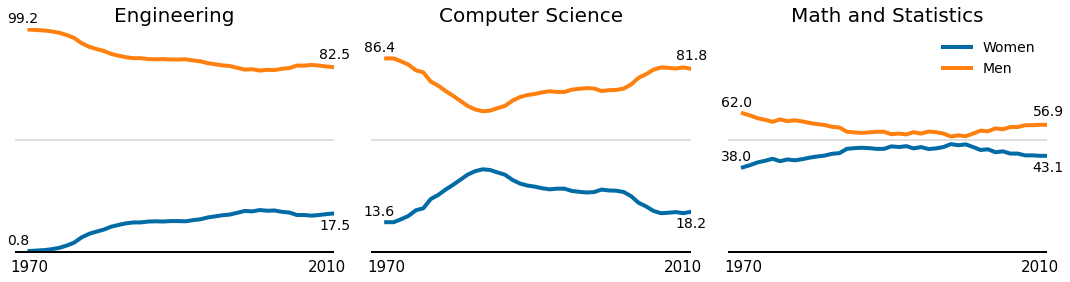

In [22]:
line_graphs(0, 3)

The three high-earning major categories (median of over 45K) are "Engineering", "Computer Science", and "Math and Statistics". All three are predominantly male (although "Match and Statistics" has a fairly large share of women), and all three have not increased their share of women in the past five years. Although "Engineering" has seen an increase in percent women of over 15 points since 1970, it still is over 80% male. Interestingly, "Computer Science" saw a significant increase in the share of women until around 1983 (up to around 40% female at it's peak), and then the share of women began to decrease until it plateaued at slighlty less than 20%. Unfortunately, this highly suggests that the share of women in the highest-earning majors is unlikely to increase significantly in the future.

#### ii) Middle-Earning Major Categories

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


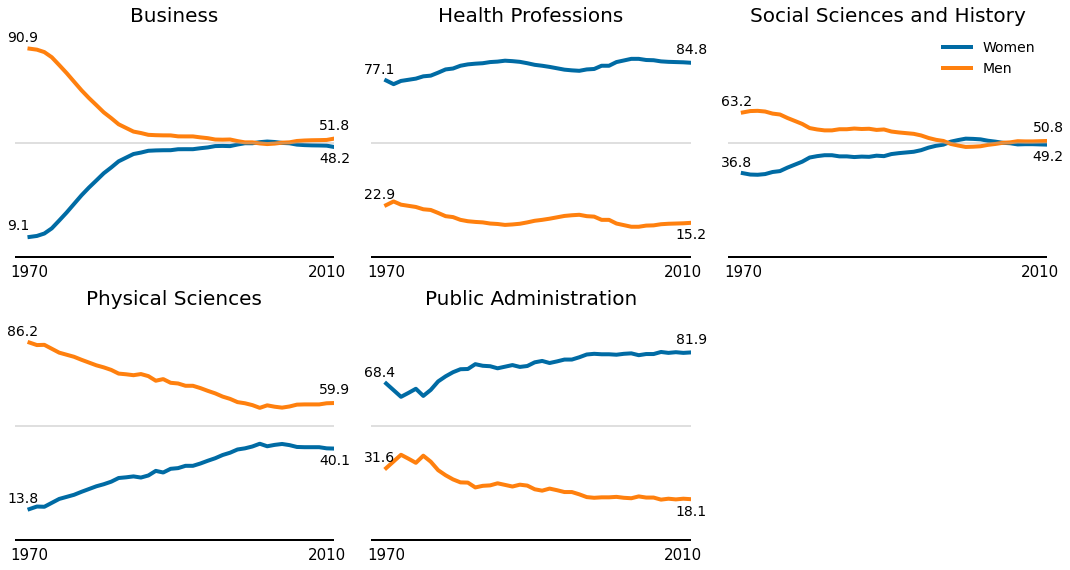

In [23]:
line_graphs(3, 8)

The five medium-earning major categories (between 35K and 45K), which include "Business", "Health Professions", "Social Science and History", "Physical Sciences", and "Public Administration". These majors have a much higher percentage of women in the workforce than the high-earning majors. Although "Health Professions" has only increased it's share of women by a small amount, it is around 85% women and "Public Administration", which is around 82% women, has increased its share of women by over 13 percentage points. Both "Business" and "Social Sciences and History" have increased their percentage of women since 1970 and now both have an roughly equal number of men and women. Only "Physical Sciences" has a significantly larger percentage of men than women, and even so the share of women has increased by over 16 percentage points since 1970. And the other two major categories, "Health Professions" and "Public Administration", have remained majority female since 1970. In the middle-earning majors, there are actually more women than there are men, so it seems as though women have made major strides towards equality in these professions.

#### iii) Low-Earning Major Categories

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with Fixed

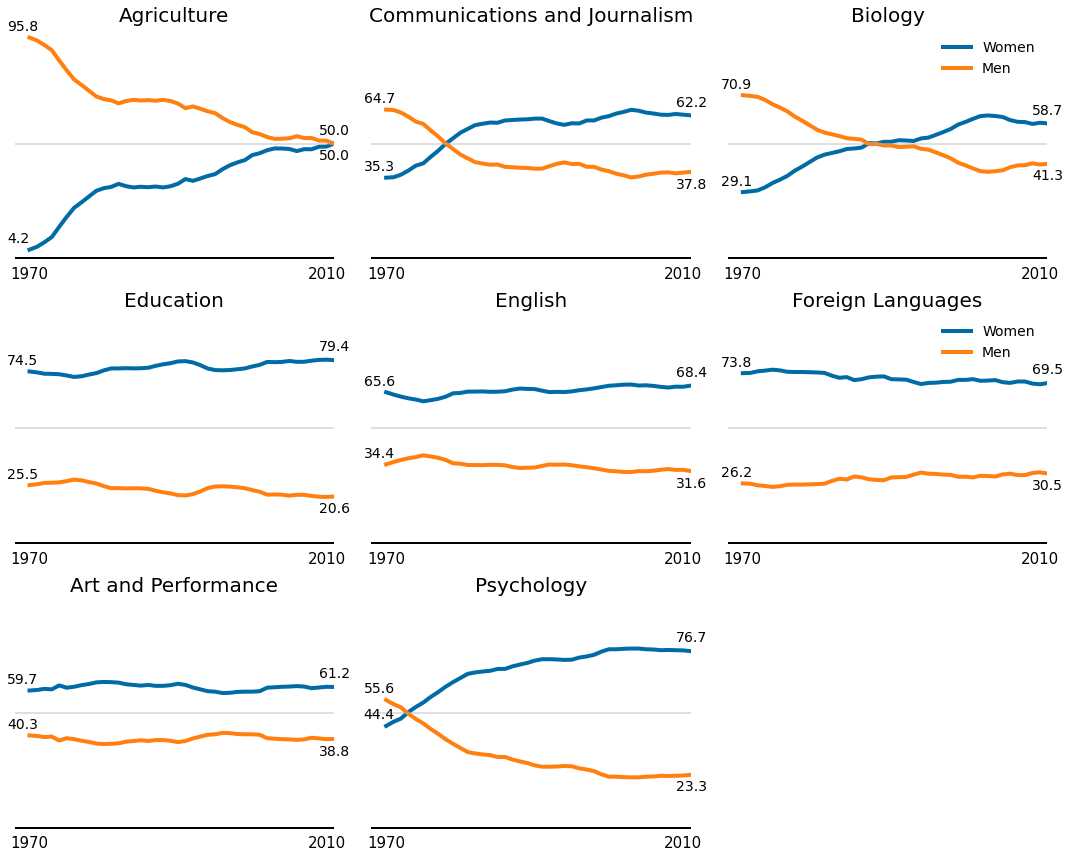

In [24]:
line_graphs(8, 16)

The remaining eight major categories are low-earning (under 35K). With the exception of "Agriculture" (which has an even number of men and women), all of these categories are majority women. What's even more astonishing is that the percentage of women in many of these major categories has increased immensely over time. "Agriculture" has increased it's share of women by nearly 50 percentage points, "Psychology" (the lowest-earning category) has increased by over 30 percentage points, and "Communications and Journalism" and "Biology" have increased by nearly 30 percentage points each. The share of women in the other four major categories hasn't changed significantly since 1970, but they were all majority female at the onset. It seems as though when more women began to enroll in universities over time, the majority of them enrolled in low-earning majors. This is counter productive if closing the wage gap between men and women is a desireable outcome.

Overall, 15 out of 16 of the major categories increased their share of women from 1970 to 2016. This implies that more women entered the workforce for the first time during this time period, which is expected.

### d) Major Categories with Less Than 15% Share of Women in 1970

In this section, I will select all major categories with less than 15% share of women in 1970 and graph how the percentage of women in these categories has changed over time. First, I will select the majors with less 15% women.

In [25]:
under_15 = majors_over_time.loc[0, majors_over_time.loc[0] < 15]
under_15

Agriculture           4.229798
Architecture         11.921005
Business              9.064439
Computer Science     13.600000
Engineering           0.800000
Physical Sciences    13.800000
Name: 0, dtype: float64

There are six major categories that had less than 15% women in 1970. Now, I will graph how the percentage of women in these majors has changed from 1970 to 2011.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(1976.5, 18.5, 'Physical Sciences')

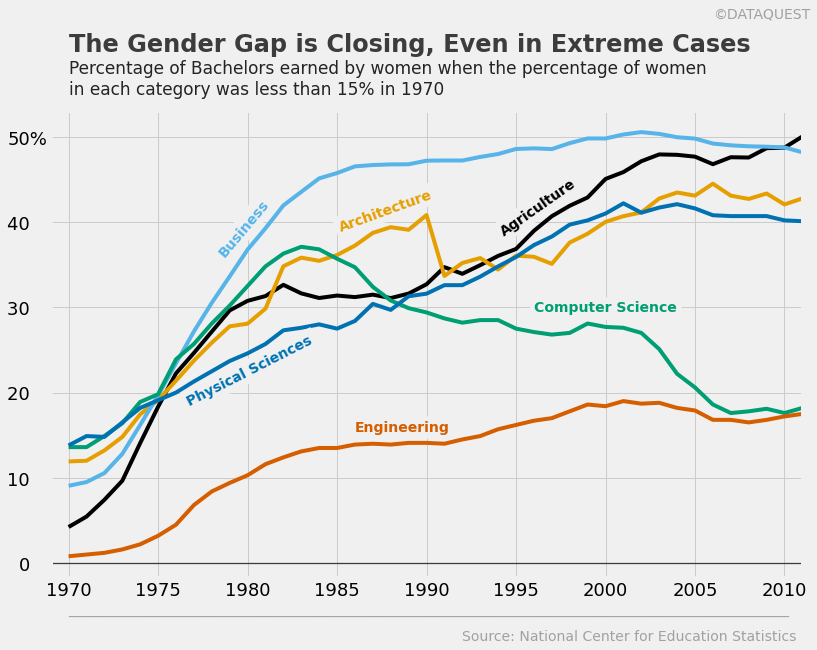

In [26]:
# Importing the style sheet for the scatter plot graph
import matplotlib.style as style
style.use('fivethirtyeight')

# Color-blind friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

# No need for legend and the indices will match those indicated in the under_15 above.
fte_graph = majors_over_time.plot(x = 'Year', y = under_15.index, figsize = (12,8), color = colors, legend = False) 

# Adjusting ticks, labels, and other graphics
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
fte_graph.set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
fte_graph.xaxis.label.set_visible(False)
fte_graph.set_xlim(left = 1969, right = 2011)
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
fte_graph.text(x = 1970, y = -6, s = "_______________________________________________________________________________________________________", color = "grey", alpha = 0.7)


# Inserting informational text, including Dataquest label, title, subtitle, and source of data 
fte_graph.text(x = 2006, y = 64, s = "©DATAQUEST", fontsize = 14, color = "grey", alpha = 0.7)
fte_graph.text(x = 1970, y = 60, s = "The Gender Gap is Closing, Even in Extreme Cases", fontsize = 24, weight = "bold", alpha = 0.75)
fte_graph.text(x = 1970, y = 55, s = "Percentage of Bachelors earned by women when the percentage of women\nin each category was less than 15% in 1970", fontsize = 17, alpha = 0.85)
fte_graph.text(x = 1992, y = -9, s = "Source: National Center for Education Statistics   ", fontsize = 14, color = "grey", alpha = 0.7)

# Colored labels for each of the different major categories
fte_graph.text(x = 1994, y = 38.5, s = 'Agriculture', color = colors[0], weight = 'bold', rotation = 35, backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1985, y = 39, s = 'Architecture', color = colors[1], weight = 'bold', rotation = 20, backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1978.25, y = 36, s = 'Business', color = colors[2], weight = 'bold', rotation = 50, backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1996, y = 29.5, s = 'Computer Science', color = colors[3], weight = 'bold', rotation = 0, backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1986, y = 15.5, s = 'Engineering', color = colors[4], weight = 'bold', backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1976.5, y = 18.5, s = 'Physical Sciences', color = colors[5], weight = 'bold', rotation = 27, backgroundcolor = '#f0f0f0')


As noted in the previous section, all of these major categories have increased their share of women significantly, with two majors (Business and Agriculture) reaching gender parity.

## 6. Results

I originally set up this project to focus on any factor that might correlate with a major's median starting salary. However, as my analysis progressed, I began to narrow my scope to the relationship between the percentage of men and women within a given major and that major's starting salary. Here are my findings.

There is a significant negative correlation between the share of women in a major and it's median starting salary. This suggest that women are enrolling in majors that are not yielding a high starting salary after graduation. The clearest example of this is in the engineering majors, which have both the highest starting salary (around 56k) and the lowest percentage of women (around 17.5%).

Of the ten highest-earning majors, 9 out of 10 are majority male with and 7 out of 10 are at least 80% male. Similarly, of the ten lowest-earning majors, all are majority female and 6 out of 10 are at least 80% female. Thus, at the extremes, almost all of the highest-earning graduates are male and almost all of the lowest-earning graduates are female.

Based on major choice alone, the average man earns a starting salary that is $4200 higher than that of a woman. This implies that the average woman makes 89 cents for every dollar a man makes solely based on which majors each gender tends to choose.

Although women have increased their share in almost every single major category since 1970, they have been disproportionally enrolling in medium-earning and low-earning majors, and thus the wage gap has not decreased by a significant margin. If reducing the wage gap is a desireable goal, it is clear that women will have to start enrolling in higher-earning majors, such as engineering, computer science, math, and statistics.